In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

polution in greenhouse gas emissions: https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv
solid waste created per country per capita: https://datacatalog.worldbank.org/search/dataset/0039597

maybe find amount of carbon produced by category (transportation, electricity, etc)
(https://www.epa.gov/ghgemissions/global-greenhouse-gas-emissions-data)

California case study:

In [3]:
cacarbonlist = [467.951, 483.080, 482.702,482.792,490.741,483.663,480.356,487.651,483.986,454.299,447.909,443.581,451.286,447.422,442.958,440.736,429.021,424.487,425.136,418.150]
cacarbondict = {range(2000,2020)[i]:cacarbonlist[i] for i in range(len(cacarbonlist))}
# source: https://ww2.arb.ca.gov/applications/greenhouse-gas-emission-inventory-0
# https://laedc.org/wp-content/uploads/2012/04/TheAB32Challenge.pdf

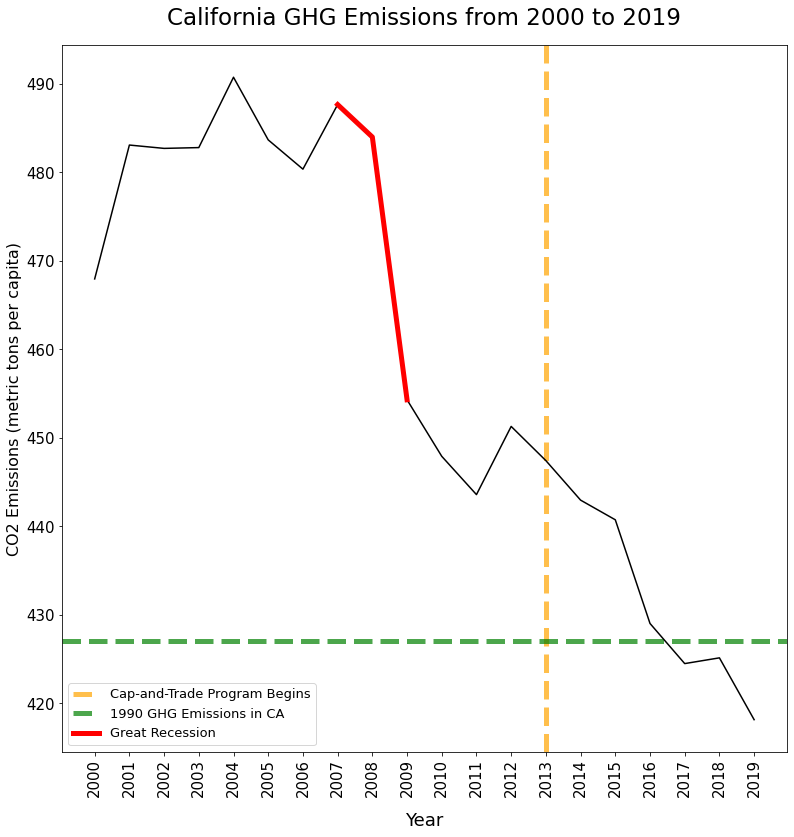

In [66]:
fig1, ax1 = plt.subplots(1, 1, figsize=(13,13))



ax1.axvline(x=2013, label='Cap-and-Trade Program Begins', c='orange', alpha = 0.7, ls='--', lw=5)
ax1.axhline(y=427, label='1990 GHG Emissions in CA', c='green', alpha = 0.7, ls='--', lw = 5)
plt.plot(cacarbondict.keys(), cacarbondict.values(), color = 'black')
ax1.plot([i for i in cacarbondict.keys()][7:10],[i for i in cacarbondict.values()][7:10], c='red', lw=5, label = "Great Recession")

ax1.legend(fontsize = 13)
ax1.set_title('California GHG Emissions from 2000 to 2019', fontsize = 23, y=1.02)
ax1.set_xlabel("Year", fontsize = 18, labelpad = 15)
ax1.set_xticks([i for i in cacarbondict.keys()])
ax1.set_xticklabels(cacarbondict.keys(), fontsize = 15, rotation = 90)
ax1.set_ylabel("GHG Emissions (millions of metric tons)", fontsize = 15)

ax1.set_ylabel("CO2 Emissions (metric tons per capita)", fontsize = 16)
ax1.set_yticks(np.around(np.arange(420,500,10),1))
ax1.set_yticklabels(np.around(np.arange(420,500,10),1), fontsize = 15)


plt.show(fig1)

1. This figure illustrates the amount of greenhouse gasses produced by California from 2000 to 2019. GHG Emissions include C02, N2O, and CH4. A significant fall in emission levels from 2007 to 2009 can be accounted for by the Great Recession, marked in red and blue. CA's Cap-and-Trade program, marked in yellow, was established in 2013 and contributed to the continual fall of GHG emissions to 1990 levels, marked in black.

In [15]:
carbonpercapita = pd.read_csv('co-emissions-per-capita.csv')
swedencarbon = carbonpercapita[carbonpercapita['Entity']=='Sweden']

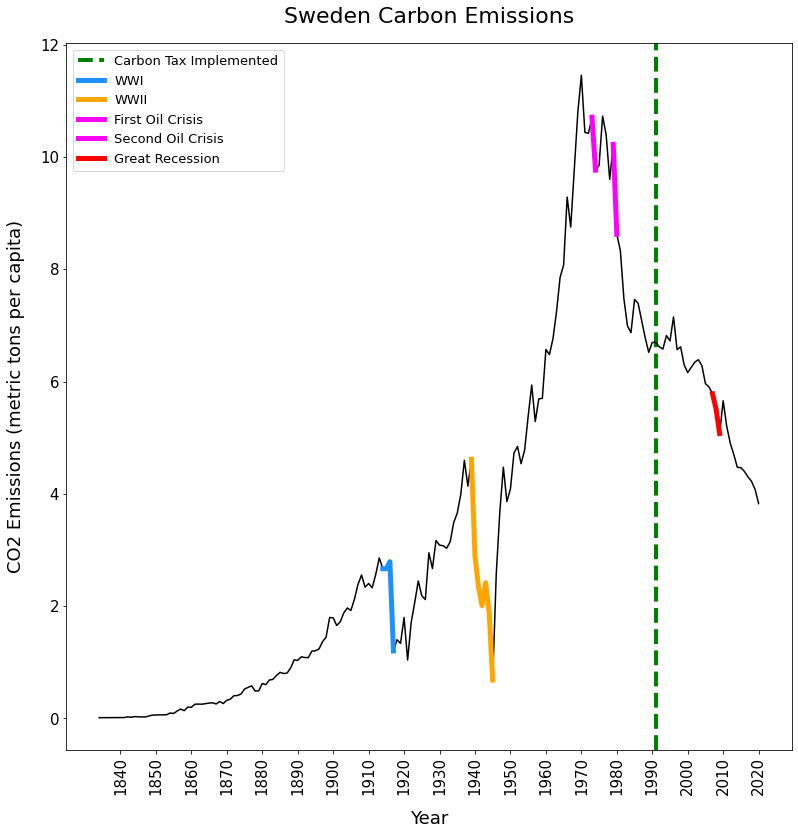

In [65]:
fig2, ax2 = plt.subplots(1,1,figsize=(13,13))


ax2.axvline(x=1991, label='Carbon Tax Implemented', c='green', alpha = 1, lw = 4, ls='--')
ax2.plot(swedencarbon['Year'], swedencarbon['Annual CO2 emissions (per capita)'], color = 'black')
ax2.plot(swedencarbon['Year'][76:80], swedencarbon['Annual CO2 emissions (per capita)'][76:80], color = 'dodgerblue', label = 'WWI', linewidth = 5)
ax2.plot(swedencarbon['Year'][101:108], swedencarbon['Annual CO2 emissions (per capita)'][101:108], color = 'orange', label = 'WWII', linewidth = 5)
ax2.plot(swedencarbon['Year'][135:137], swedencarbon['Annual CO2 emissions (per capita)'][135:137], color = 'fuchsia', label = 'First Oil Crisis', linewidth = 5)
ax2.plot(swedencarbon['Year'][141:143], swedencarbon['Annual CO2 emissions (per capita)'][141:143], color = 'fuchsia', label = 'Second Oil Crisis', linewidth = 5)
ax2.plot(swedencarbon['Year'][169:172], swedencarbon['Annual CO2 emissions (per capita)'][169:172], color = 'red', label = 'Great Recession', linewidth = 5)

ax2.legend(fontsize=13)
ax2.set_title('Sweden Carbon Emissions', fontsize = 22, y=1.02)
ax2.set_xlabel("Year", fontsize = 18, labelpad=15)
ax2.set_xticks(swedencarbon['Year'][2::10])
ax2.set_xticklabels(swedencarbon['Year'][2::10], fontsize = 15, rotation = 90)
ax2.set_ylabel("CO2 Emissions (metric tons per capita)", fontsize = 18, labelpad=15)
ax2.set_yticks(np.around(np.arange(0,14,2),1))
ax2.set_yticklabels(np.around(np.arange(0,14,2),1), fontsize = 15)

plt.show(fig2)
# sources: https://en.wikipedia.org/wiki/1973_oil_crisis#:~:text=By%20the%20end%20of%20the,politics%20and%20the%20global%20economy.
# https://ourworldindata.org/co2/country/sweden

2. This graph shows Sweden's CO2 emission per capita from 1834 to 2020 from ourworldindata.com (https://ourworldindata.org/co2/country/sweden). It includes the occurrences of several major historical world events and their effects on the carbon emissions of the Swedish people.

In [31]:
# renewable energy in Germany
# "Energiewende"
# source: https://www.macrotrends.net/countries/DEU/germany/renewable-energy-statistics
# https://www.iea.org/countries/germany
germanyenergy = pd.read_excel('German Renewable Energy.xlsx', header=0)
germanycarbon = carbonpercapita[(carbonpercapita['Entity']=='Germany')&(carbonpercapita['Year']>=1990)]
germanyrenew=germanyenergy['percent renewable']
germanynonrenew =[1-i for i in germanyrenew]

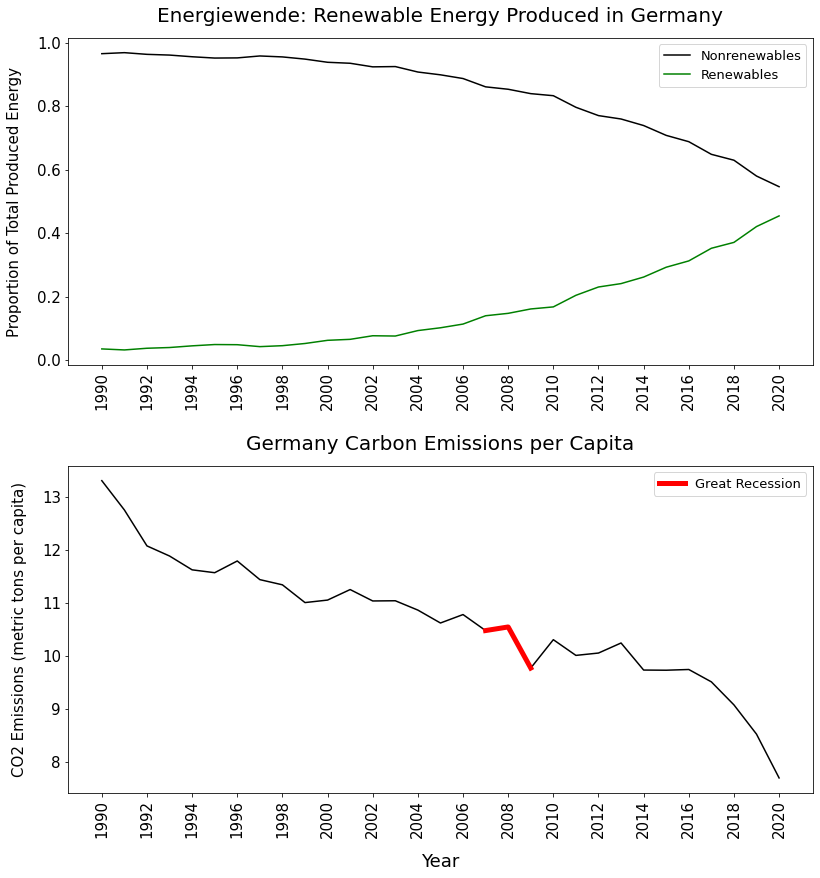

In [67]:
fig3, (ax3, ax32) = plt.subplots(2,1,figsize=(13,13))

fig3.tight_layout(pad=8.0)

ax3.plot(germanyenergy['year'], germanynonrenew, color = 'black', label = 'Nonrenewables')
ax3.plot(germanyenergy['year'], germanyrenew, color = 'green', label = 'Renewables')
ax32.plot(germanycarbon['Year'], germanycarbon['Annual CO2 emissions (per capita)'], c = 'black')
ax32.plot(germanycarbon['Year'][17:20], germanycarbon['Annual CO2 emissions (per capita)'][17:20], color = 'red', label = 'Great Recession', linewidth = 5)


ax3.set_title('Energiewende: Renewable Energy Produced in Germany', fontsize = 20, y=1.03)
ax3.set_xticks(germanyenergy['year'][::2])
ax3.set_xticklabels(germanyenergy['year'][::2], fontsize = 15, rotation = 90)
ax3.set_ylabel("Proportion of Total Produced Energy", fontsize = 15, labelpad = 15)
ax3.set_yticks(np.around(np.arange(0,1.2,0.2),1))
ax3.set_yticklabels(np.around(np.arange(0,1.2,0.2),1), fontsize = 15)
ax3.legend(fontsize = 13)

ax32.set_title('Germany Carbon Emissions per Capita', fontsize = 20,y = 1.03)
ax32.set_xticks(germanycarbon['Year'][::2])
ax32.set_xticklabels(germanycarbon['Year'][::2], fontsize = 15, rotation = 90)
ax32.set_ylabel("CO2 Emissions (metric tons per capita)", fontsize = 15, labelpad=15)
ax32.set_yticks(np.around(np.arange(8,14,1),1))
ax32.set_yticklabels(np.around(np.arange(8,14,1),1), fontsize = 15)
ax32.legend(fontsize = 13)

plt.xlabel("Year", fontsize = 18, labelpad=15)
plt.show(fig3)
# sources:
# https://en.wikipedia.org/wiki/1973_oil_crisis#:~:text=By%20the%20end%20of%20the,politics%20and%20the%20global%20economy.
# https://ourworldindata.org/co2/country/germany
# https://www.macrotrends.net/countries/DEU/germany/renewable-energy-statistics
# https://www.iea.org/countries/germany

3. This set of graphs compares the change in the source of Germany's produced energy to the decrease of Germany's carbon emissions from 1990 to 2020. In 2010, Germany declared "Energiewende," a general shift in political and popular sentiment to tackle climate issues, but their efforts of reducing carbon emissions and dependencies on nonrenewable energy sources have been ongoing since the late 1900s.

In [24]:
chinacarbon = carbonpercapita[(carbonpercapita['Entity']=='China')]

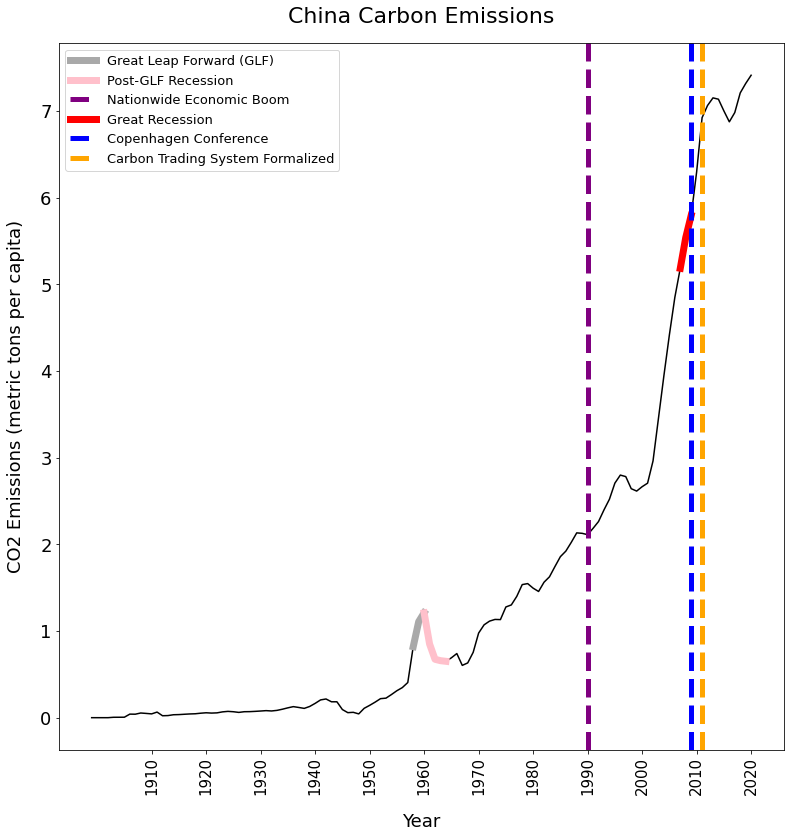

In [63]:
fig4, ax4 = plt.subplots(1,1,figsize=(13,13))


ax4.plot(chinacarbon['Year'], chinacarbon['Annual CO2 emissions (per capita)'], c = 'black')
ax4.plot(chinacarbon['Year'][57:60], chinacarbon['Annual CO2 emissions (per capita)'][57:60], c = 'darkgray', label = 'Great Leap Forward (GLF)', lw=7)
ax4.plot(chinacarbon['Year'][59:64], chinacarbon['Annual CO2 emissions (per capita)'][59:64], c = 'pink', label = 'Post-GLF Recession', lw=7)

ax4.axvline(x=1990, label='Nationwide Economic Boom', c='purple', alpha = 1, lw = 5, ls='--')
ax4.plot(chinacarbon['Year'][106:109], chinacarbon['Annual CO2 emissions (per capita)'][106:109], color = 'red', label = 'Great Recession', linewidth = 7)

ax4.axvline(x=2009, label='Copenhagen Conference', c='blue', alpha = 1, lw = 5, ls='--')
ax4.axvline(x=2011, label='Carbon Trading System Formalized', c='orange', alpha = 1, lw = 5, ls='--')
ax4.legend(fontsize = 13)

ax4.set_title('China Carbon Emissions', fontsize = 22, y=1.02)
ax4.set_xlabel("Year", fontsize = 18, labelpad = 18)
ax4.set_xticks(chinacarbon['Year'][::-10])
ax4.set_xticklabels(chinacarbon['Year'][::-10], fontsize = 15, rotation = 90)
ax4.set_ylabel("CO2 Emissions (metric tons per capita)", fontsize = 18,labelpad=15)
ax4.set_yticks([i for i in range(8)])
ax4.set_yticklabels([i for i in range(8)], fontsize = 18)

plt.show()

4. This graph shows the history of China's carbon emissions from 1899 to 2020. China is the leading country in carbon emissions, and air pollution from the country is a global threat. Implemented in 2011, the first explicit policy to address carbon reductions aimed to reduce carbon intensity (carbon emissions to GDP ratio) by 40% of 2005 levels. Carbon emission levels per capita are still rising in China, but the rate has decreased significantly.

In [47]:
chinacarbon['Year'].reset_index(drop=True)[106:109]

106    2007
107    2008
108    2009
Name: Year, dtype: int64